## Import Library

In [26]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [27]:
heart = pd.read_csv(r'C:\\Users\\Benai\\Documents\\machin-learning\\classification-model-evaluation\heart.csv')

In [28]:
# Check first five row of the dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [29]:
# no of rows and columns 
heart.shape

(1025, 14)

In [30]:
# descriptive statistics.
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
# chreck for missing value 
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## separate  predictors and target variable 

In [32]:
x = heart.iloc[:,:-1]
y = heart.iloc[:,-1]

## Train test split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Fit data to the model 

In [34]:
# instance object
rfc = LogisticRegression(max_iter=180)

rfc.fit(x_train, y_train)

C:\Users\Benai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=180)

In [35]:
# predict using test data
y_predict = rfc.predict(x_test)

# Evaluate model 
## 1. Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)

print('Confusion matrix:\n', cm)

print("\nNo of 1's and 0's:\n ", y_test.value_counts())

Confusion matrix:
 [[80 16]
 [14 95]]

No of 1's and 0's:
  1    109
0     96
Name: target, dtype: int64


## Metrics computed from a confusion matrix
### a) Classification Rate/Accuracy

In [37]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_predict)

print('Accuracy score :', acc_score)

Accuracy score : 0.8536585365853658


### b) Misclassification Rate

In [38]:
# slice confusion matrix into four pieces
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

mcr = (FP + FN) / float(FP + FN + TP + TN)

print('Misclassification Rate: ', mcr)

Misclassification Rate:  0.14634146341463414


### c) Sensitivity / Recall / True Positive Rate

In [39]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_predict)

print('Recall score: ', recall)

Recall score:  0.8715596330275229


In [48]:
# or calculate
print(TP / float(TP + FN))

0.8715596330275229


### d) Specificity / True Negative Rate

In [49]:
specificity = TN / (TN + FP)

print('Specificity: ', specificity)

Specificity:  0.8333333333333334


### e) precision

In [50]:
from sklearn.metrics import precision_score

precision = recall_score(y_test, y_predict)

print('Precision: ', precision)

Precision:  0.8715596330275229


In [51]:
# or calculate
print(TP / float(TP + FP))

0.8558558558558559


### f) False Positive Rate

In [55]:
false_positive_rate = FP / float(TN + FP)

print('False Positive Rate: ',false_positive_rate)

False Positive Rate:  0.16666666666666666


In [54]:
# or calculate
print(1 - specificity)

0.16666666666666663


## 2. F1 Score

In [57]:
from sklearn.metrics import f1_score

f_one = f1_score(y_test, y_predict)

print('F1 score : ', f_one)

F1 score :  0.8636363636363636


## 3. ROC - AUC Curve

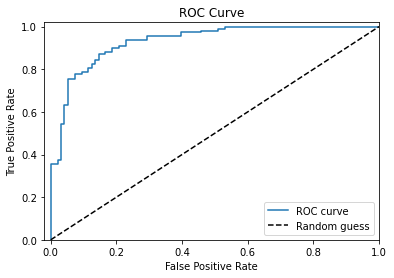

In [63]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, rfc.predict_proba(x_test)[:,1])

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()

## 4. Logistic loss

In [64]:
from sklearn.metrics import log_loss

log_loss_score = log_loss(y_test, rfc.predict_proba(x_test))

print(' Logistic loss :', log_loss_score)

 Logistic loss : 0.3445682843672782
